<a href="https://colab.research.google.com/github/arupbh/LearnAI/blob/main/Question2_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install --upgrade gensim --user
import numpy as np
import pandas as pd

In [34]:
# Define word list
words = ["Tiger", "Dolphin", "Eagle", "Kangaroo", "Octopus", "Penguin", "Elephant", "Fox", "Giraffe", "Wolf",
"Doctor", "Engineer", "Teacher", "Chef", "Pilot", "Artist", "Lawyer", "Firefighter", "Mechanic", "Farmer",
"Joy", "Anger", "Fear", "Surprise", "Sadness", "Love", "Envy", "Pride", "Disgust", "Hope",
"Apple", "Banana", "Mango", "Grape", "Orange", "Pineapple", "Strawberry", "Watermelon", "Cherry", "Kiwi",
"Guitar", "Violin", "Piano", "Trumpet", "Drums"]

In [35]:
import gensim.downloader as api

In [36]:
# Load pre-trained Model
model = api.load("word2vec-google-news-300")

In [37]:
# Get vectors (300D)
vectors = {word: model[word] for word in words if word in model}

In [38]:
filtered_words = [word for word in words if word in model]  # In case any are missing
vector_array = np.array(list(vectors.values()))

In [39]:
#vector_array

In [40]:
# Reduce dimensions from 300 to 3D using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [41]:
vectors_3d = pca.fit_transform(vector_array)

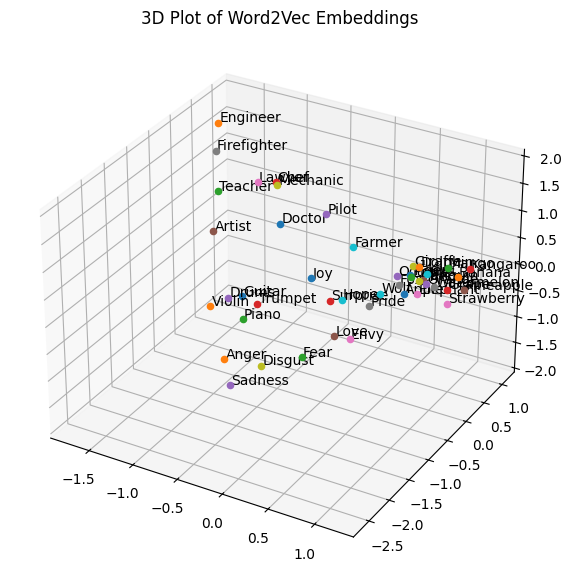

In [42]:
# Plot in 3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(filtered_words):
    x, y, z = vectors_3d[i]
    ax.scatter(x, y, z, marker='o')
    ax.text(x + 0.01, y + 0.01, z + 0.01, word)

ax.set_title("3D Plot of Word2Vec Embeddings")
plt.show()

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
# Define word pairs
pairs = [("Firefighter", "Engineer"), ("Piano", "Violin"), ("Farmer", "Pilot"), ("Joy", "Fear")]

# Compute cosine similarity
for w1, w2 in pairs:
    if w1 in model and w2 in model:
        vec1 = model[w1].reshape(1, -1)
        vec2 = model[w2].reshape(1, -1)
        sim = cosine_similarity(vec1, vec2)[0][0]
        print(f"Similarity between '{w1}' and '{w2}': {sim:.4f}")
    else:
        print(f"One or both words not in model: {w1}, {w2}")


Similarity between 'Firefighter' and 'Engineer': 0.3176
Similarity between 'Piano' and 'Violin': 0.6187
Similarity between 'Farmer' and 'Pilot': 0.1965
Similarity between 'Joy' and 'Fear': 0.1499
